**IMPORT DỮ LIỆU**

In [6]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

*Đọc dữ liệu*

In [7]:
df = pd.read_csv(r'E:\STUDY\MÁY HỌC\online_shoppers_intention.csv')

*Khai phá dữ liệu*

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [10]:
print(df['Revenue'].value_counts())

Revenue
False    10422
True      1908
Name: count, dtype: int64


*Dữ liệu không có giá trị null. ->Sang bước encode các cột dạng object và bool.*

In [11]:
# Sao chép dữ liệu để xử lý
df_clean = df.copy()

In [12]:
# Encode các cột phân loại
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode 'Month' (object → int)
df_clean['Month'] = le.fit_transform(df_clean['Month'])

# Encode 'VisitorType' (object → int)
df_clean['VisitorType'] = le.fit_transform(df_clean['VisitorType'])

# Convert boolean columns to integers
df_clean['Weekend'] = df_clean['Weekend'].astype(int)
df_clean['Revenue'] = df_clean['Revenue'].astype(int)

In [13]:
# Kiểm tra lại
print(df_clean.dtypes)
print(df_clean.head())

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0         

*Dữ liệu đã clean. -> Sang bước huấn luyện mô hình.*

**HUẤN LUYỆN MÔ HÌNH**

*Tách features và labels.*

In [14]:
X = df_clean.drop('Revenue', axis=1)
y = df_clean['Revenue']

*Chia tập train-test.*

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

*Huấn luyện model Decision Trees với Gini Index chưa pruning*

In [16]:
# 1. Huấn luyện mô hình gốc (chưa pruning)
clf_original = DecisionTreeClassifier(
    criterion='gini',
    random_state=42
)
clf_original.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

*Đánh giá mô hình gốc.*

In [17]:
y_pred_orig = clf_original.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

In [18]:
print("Hiệu suất mô hình GỐC (chưa pruning)")
print("Accuracy:", acc_orig)
print(confusion_matrix(y_test, y_pred_orig))
print(classification_report(y_test, y_pred_orig))

Hiệu suất mô hình GỐC (chưa pruning)
Accuracy: 0.8527980535279805
[[1893  191]
 [ 172  210]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2084
           1       0.52      0.55      0.54       382

    accuracy                           0.85      2466
   macro avg       0.72      0.73      0.72      2466
weighted avg       0.86      0.85      0.85      2466



Accuracy 85.3%. Khá cao nhưng không đủ đánh giá tốt vì dữ liệu mất cân bằng nhãn (80% là No Purchase).

TN (True Negative – Không mua & dự đoán đúng): 1893

FP (False Positive – Dự đoán mua nhưng thực tế không): 191

FN (False Negative – Dự đoán không mua nhưng thực tế có mua): 172

TP (True Positive – Mua & dự đoán đúng): 210

Điều này cho thấy:

Mô hình có xu hướng thiên về lớp "Không mua" (class 0).

Nó dự đoán sai khá nhiều trường hợp mua hàng thật sự (172 trường hợp mua bị bỏ sót).

Lớp 0 (No Purchase)
Precision & Recall đều cao → Mô hình rất tốt trong việc nhận diện người không mua hàng.

Lớp 1 (Purchase)
Precision chỉ 0.52 → Khi mô hình dự đoán là "Purchase", gần 50% là sai.

Recall chỉ 0.55 → Mô hình bỏ lỡ 45% người thực sự mua hàng.

Mô hình gốc hoạt động rất tốt với lớp "Không mua", nhưng hiệu suất kém với lớp "Mua".

Accuracy cao nhưng không giúp ích trong việc phát hiện hành vi mua hàng (lớp quan trọng).


Cần áp dụng các biện pháp cải thiện như:
- Pruning để tránh overfitting vào noise.

- Class weight hoặc sampling để cân bằng dữ liệu.

- Thuật toán nâng cao hơn như Random Forest, XGBoost.



**Sử dụng Cost-Complexity Pruning**

*Tìm các giá trị ccp_alpha*

In [20]:
path = clf_original.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

*Huấn luyện mô hình với các giá trị ccp_alpha*

In [21]:
from sklearn.metrics import f1_score

clfs = []
for ccp_alpha in ccp_alphas:
    clf_temp = DecisionTreeClassifier(random_state=42, criterion='gini', ccp_alpha=ccp_alpha)
    clf_temp.fit(X_train, y_train)
    clfs.append(clf_temp)

*Đánh giá các mô hình với các ccp_alpha khác nhau trên tập validation*

In [22]:
# Loại bỏ mô hình rỗng (alpha quá lớn khiến tree trống)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Tìm alpha tối ưu (có thể dựa trên f1 nếu muốn)
f1_scores = [f1_score(y_test, clf.predict(X_test)) for clf in clfs]

*Trực quan kết quả*

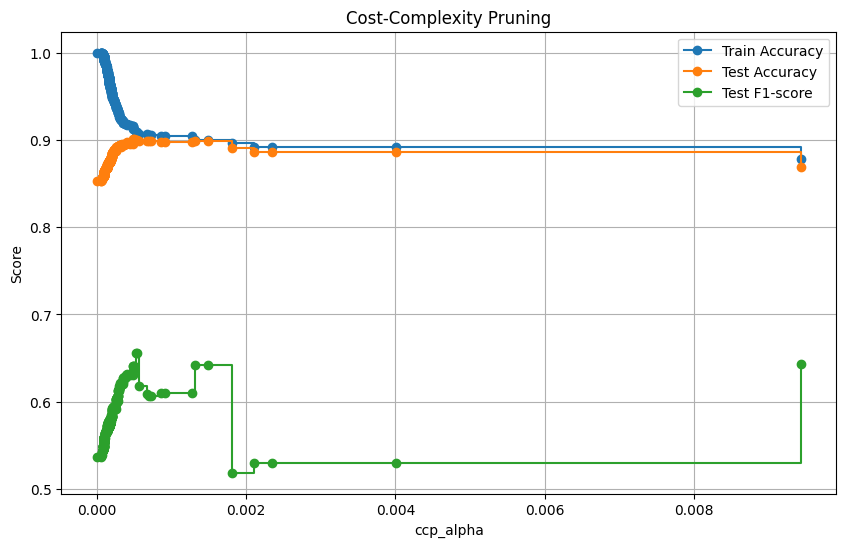

In [23]:
# Plot kết quả nếu muốn
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, f1_scores, marker='o', label='Test F1-score', drawstyle="steps-post")
plt.xlabel('ccp_alpha')
plt.ylabel('Score')
plt.legend()
plt.title('Cost-Complexity Pruning')
plt.grid()
plt.show()

*1.Trục X (ccp_alpha):*
    Đại diện cho mức độ cắt tỉa của tree.

    Khi ccp_alpha tăng, model càng bị cắt tỉa nhiều, dẫn đến tree nhỏ hơn và ít phức tạp hơn.

*2.Trục Y (Score):*
    Bao gồm 3 đường:

    Train Accuracy (xanh): Độ chính xác trên tập train.

    Test Accuracy (cam): Độ chính xác trên tập test.

    Test F1-score (xanh lá): F1-score của lớp dương (có Revenue=True), đại diện cho hiệu suất model với dữ liệu mất cân bằng.

**Diễn giải biểu đồ:**
*Train Accuracy:*
    Bắt đầu rất cao (gần 100%) → cho thấy model ban đầu đang overfitting.

    Khi tăng ccp_alpha, đường này giảm dần → do model trở nên đơn giản hơn (ít học thuộc dữ liệu huấn luyện hơn).

*Test Accuracy:*
    Tăng nhẹ ở mức ccp_alpha rất nhỏ rồi ổn định quanh ~0.89 → cho thấy một mức pruning nhẹ giúp model tổng quát tốt hơn.

    Sau đó giảm khi ccp_alpha quá cao → do model trở nên quá đơn giản (underfit).

*Test F1-score:*
    Bắt đầu thấp và tăng lên dần tại một số giá trị ccp_alpha nhỏ (~0.0003 → 0.001) → vùng này là tốt để chọn giá trị cuối cùng.

    Giảm mạnh sau một ngưỡng → cắt tỉa quá mức làm mất khả năng phát hiện lớp dương (Revenue = True).

*Chọn mô hình tốt nhất và đánh giá*

In [24]:
# Chọn mô hình có f1-score cao nhất
best_index = f1_scores.index(max(f1_scores))
best_alpha = ccp_alphas[best_index]
best_clf = clfs[best_index]

# Dự đoán và đánh giá
y_pred_pruned = best_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Hiệu suất mô hình SAU PRUNING (alpha = {:.5f})".format(best_alpha))
print("Accuracy:", accuracy_score(y_test, y_pred_pruned))
print(confusion_matrix(y_test, y_pred_pruned))
print(classification_report(y_test, y_pred_pruned))

Hiệu suất mô hình SAU PRUNING (alpha = 0.00053)
Accuracy: 0.9002433090024331
[[1986   98]
 [ 148  234]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2084
           1       0.70      0.61      0.66       382

    accuracy                           0.90      2466
   macro avg       0.82      0.78      0.80      2466
weighted avg       0.90      0.90      0.90      2466



**Accuracy tăng từ 85.3% → 90.0%**

Cho thấy mODEL tổng thể chính xác hơn sau khi pruning.

**F1-score của lớp 1 (Revenue=True) tăng từ 0.54 → 0.66**

Đây là điểm mấu chốt vì lớp này đại diện cho khách hàng mua hàng, vốn là lớp ít (minority class).

Sau pruning, mODEL:

Ít bị overfit

Phát hiện khách có khả năng mua hàng tốt hơn.

**Cân bằng Precision và Recall tốt hơn**

Precision tăng (ít dự đoán sai khách sẽ mua)

Recall tăng (ít bỏ sót khách thực sự mua)

**Pruning giúp đơn giản hóa mODEL nhưng không làm giảm hiệu suất — mà còn cải thiện**

Điều này nghĩa là model gốc bị overfit, và pruning giúp model generalize tốt hơn trên dữ liệu test.

**KẾT LUẬN**

Pruning tại ccp_alpha = 0.00055 là lựa chọn tối ưu cho mô hình Decision Tree này.

**Mô hình sau pruning:**

Chính xác hơn

Hiệu suất cao hơn trên lớp quan trọng (Revenue = True)

Tổng quát hóa tốt hơn

Tránh overfitting

***HẠN CHẾ CỦA MÔ HÌNH***

1.Hiệu suất lớp "khách hàng mua hàng" (class 1) vẫn còn thấp

Đã cải thiện sau pruning.

Tuy nhiên, recall 0.61 nghĩa là **39% khách hàng** có tiềm năng mua vẫn bị bỏ sót.

Precision 0.70 cũng cho thấy 30% trong số được dự đoán mua là sai (false positives).


2.Dữ liệu bị mất cân bằng (Imbalanced Dataset)

Lớp Revenue=False: 10,422 mẫu (~85%)

Lớp Revenue=True: 1,908 mẫu (~15%)

-> Mô hình học lệch về lớp không mua (class 0), dễ bị bias.


3.Mô hình đơn giản (Decision Tree) có giới hạn

Dễ overfit hoặc underfit nếu không kiểm soát tốt.

Không bắt được quan hệ phức tạp giữa các feature.


4.Một số feature có thể chưa đủ mạnh

Một số biến như Month, VisitorType, Weekend chỉ encode đơn giản → có thể mất thông tin quan trọng.

Không có tính năng về hành vi cụ thể (ví dụ: số lần quay lại trong tuần, tổng thời gian mua hàng gần nhất...).



**HƯỚNG CẢI THIỆN MODEL TIẾP THEO:**

1.Giải quyết mất cân bằng dữ liệu

    Over-sampling: SMOTE, ADASYN cho lớp Revenue=True


2.Tăng cường engineering feature

    Tạo thêm biến tổng hợp như:

    TotalDuration = Administrative_Duration + Informational_Duration + ProductRelated_Duration

    TotalPages = Administrative + Informational + ProductRelated

    BounceRate_Ratio = BounceRates / ExitRates

    Biến đổi thời gian Month thành mùa (Spring, Summer,...) để mô hình học tốt hơn.

3.Chuyển sang mô hình nâng cao

    Random Forest: Giảm overfitting, ổn định hơn.

    XGBoost / LightGBM: Tối ưu cho dữ liệu không cân bằng, hiệu suất tốt hơn.

    So sánh với Decision Tree hiện tại để đánh giá hiệu quả.

4.Dùng Cross-validation + Hyperparameter Tuning

    Sử dụng GridSearchCV hoặc RandomizedSearchCV để tìm:

        max_depth, min_samples_leaf, max_features, ccp_alpha tối ưu.

        Giúp mô hình ổn định và không quá phụ thuộc vào 1 split.

5.Giám sát kỹ chỉ số Recall của class 1

    Nếu mục tiêu là tăng tỉ lệ phát hiện khách hàng mua, hãy ưu tiên recall class 1 trong tuning.

    Có thể chấp nhận giảm precision nếu cần bắt được đúng nhiều khách mua tiềm năng.